## 理论基础

### 数学原理和公式推理

**1. 距离度量**

KNN的核心思想是根据距离来判断数据点的类别或回归值。常用的距离度量是欧几里得距离。

给定两个点 $ x = (x_1, x_2, ..., x_n) $ 和 $ y = (y_1, y_2, ..., y_n) $，它们的欧几里得距离可以表示为：
$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$
其他常用的距离度量包括曼哈顿距离和闵可夫斯基距离等。

**2. 分类任务**

对于分类任务，KNN会根据K个最近邻的类别进行多数表决。

假设我们有一个待分类点 $ x $，其K个最近邻点的类别分别为 $ y_1, y_2, ..., y_K $，则 $ x $ 的类别 $ \hat{y} $ 由以下公式确定：
$$
 \hat{y} = \text{mode}(y_1, y_2, ..., y_K) 
$$


其中，mode表示众数，即出现次数最多的类别。

**3. 回归任务**

对于回归任务，KNN会根据K个最近邻点的数值进行平均。

假设我们有一个待预测点 $ x $，其K个最近邻点的数值分别为 $ y_1, y_2, ..., y_K $，则 $ x $ 的预测值 $ \hat{y} $ 由以下公式确定：
$$
\hat{y} = \frac{1}{K} \sum_{i=1}^{K} y_i
$$

### 算法流程

**步骤1：准备数据**

准备训练数据集 $ \{(x_i, y_i)\}_{i=1}^{N} $，其中 $ x_i $ 是第 $ i $ 个数据点的特征向量， $ y_i $ 是第 $ i $ 个数据点的标签或数值。

**步骤2：选择参数K**

选择一个合适的K值。K通常是一个小的正整数，可以通过交叉验证等方法来选择最佳的K值。

**步骤3：计算距离**

对于待预测的点 $ x $，计算它到训练集中所有数据点的距离。假设训练集中有N个数据点，距离计算公式为：

$ d(x, x_i) = \sqrt{\sum_{j=1}^{n} (x_j - x_{ij})^2} $

**步骤4：选择K个最近邻**

根据计算出的距离，对所有训练数据点进行排序，选择距离最近的K个数据点。这些点的索引可以表示为 $ \{i_1, i_2, ..., i_K\} $。

**步骤5：做出预测**


- 对于分类任务，统计这K个最近邻点的类别频率，选择出现频率最高的类别作为预测结果。

$$
 \hat{y} = \text{mode}(y_{i_1}, y_{i_2}, ..., y_{i_K}) 
$$



- 对于回归任务，计算这K个最近邻点的数值平均值，作为预测结果。

$$
 \hat{y} = \frac{1}{K} \sum_{j=1}^{K} y_{i_j} 
$$



**步骤6：返回结果**

将预测结果 $ \hat{y} $ 返回给用户。

### 详细推理示例

假设我们有如下二维平面上的训练数据点及其类别：

| 数据点 | 坐标 (x, y) | 类别 |
| ------ | ----------- | ---- |
| 点A    | (1, 2)      | 0    |
| 点B    | (2, 3)      | 0    |
| 点C    | (3, 3)      | 1    |
| 点D    | (6, 5)      | 1    |

现在，我们有一个待分类的新数据点 $ x = (3, 2) $，选择K=3。

步骤：

**1. 计算距离**：

- 点A到x的距离：$ d(A, x) = \sqrt{(1-3)^2 + (2-2)^2} = \sqrt{4} = 2 $
- 点B到x的距离：$ d(B, x) = \sqrt{(2-3)^2 + (3-2)^2} = \sqrt{1+1} = \sqrt{2} \approx 1.41 $
- 点C到x的距离：$ d(C, x) = \sqrt{(3-3)^2 + (3-2)^2} = \sqrt{1} = 1 $
- 点D到x的距离：$ d(D, x) = \sqrt{(6-3)^2 + (5-2)^2} = \sqrt{9+9} = \sqrt{18} \approx 4.24 $

**2. 选择K个最近邻**：

最近的3个邻居是点C、点B和点A。

**3. 做出预测**：

最近邻的类别分别是：1、0、0。多数类别是0，因此预测结果为0。

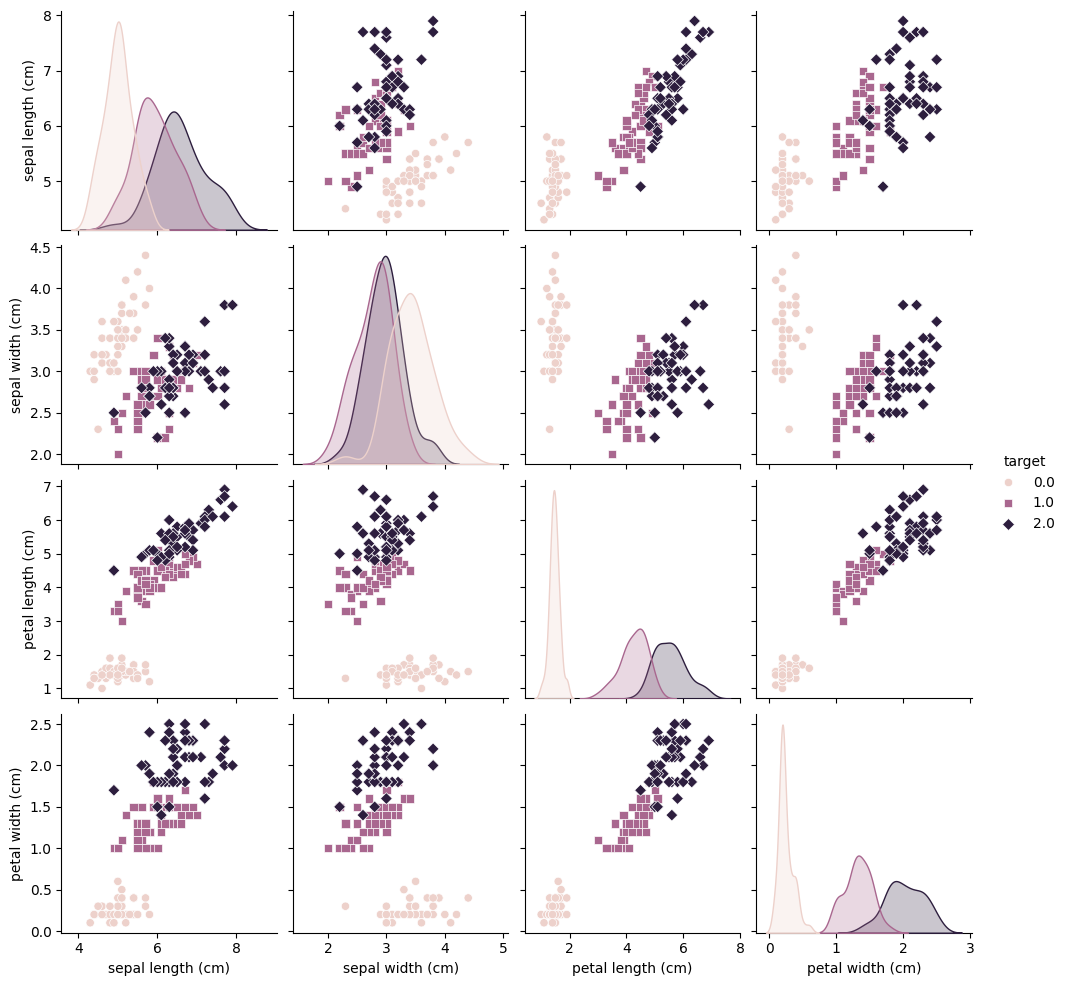

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

# 数据可视化
sns.pairplot(df, hue='target', markers=["o", "s", "D"])
plt.show()

In [3]:
# 数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

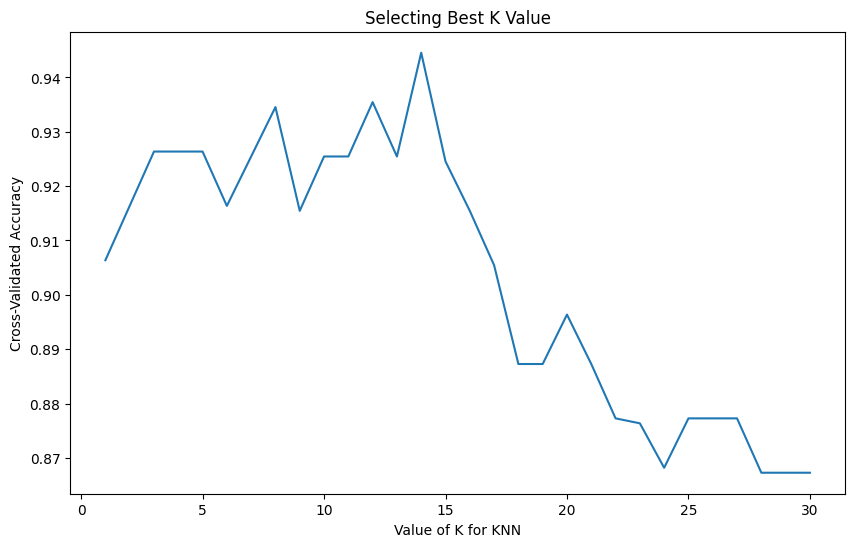

Best K value: 14


In [4]:
from sklearn.model_selection import cross_val_score

# 寻找最佳的K值
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# 可视化K值选择过程
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Selecting Best K Value')
plt.show()

# 选择最佳K值
best_k = k_range[np.argmax(k_scores)]
print(f"Best K value: {best_k}")

In [5]:
# 使用最佳K值训练模型
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# 模型预测
y_pred = knn.predict(X_test)

# 模型评估
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



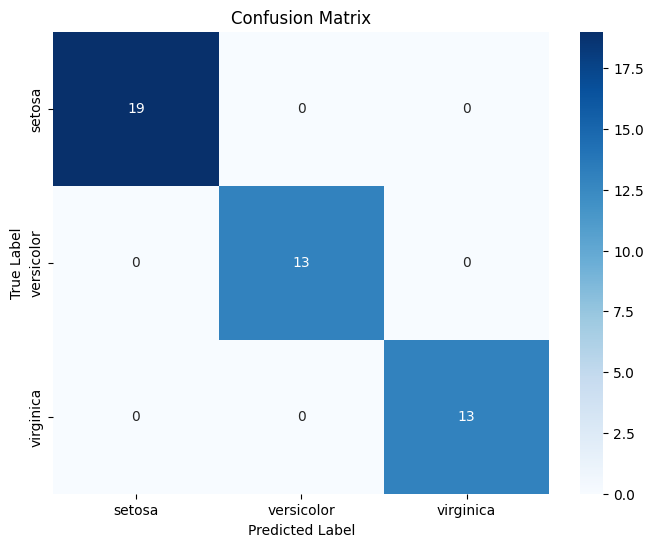

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()